In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


In [24]:
cbb_data = pd.read_csv('cbb.csv')

In [25]:
cbb_data.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFGO', 'EFGD',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', 'TwoPO', 'TwoPD', 'ThreePO',
       'ThreePD', 'ADJT', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

# **EDA**




In [26]:
#Selecting teams that particapted in March Madness
March_qualified = cbb_data[cbb_data['POSTSEASON'].notna()].reset_index(drop=True)
Postseason_labels = ['R68', 'R64','R32','S16','E8', 'F4','2ND','Champions']

Text(0.5, 1.0, 'Defensive Correlations')

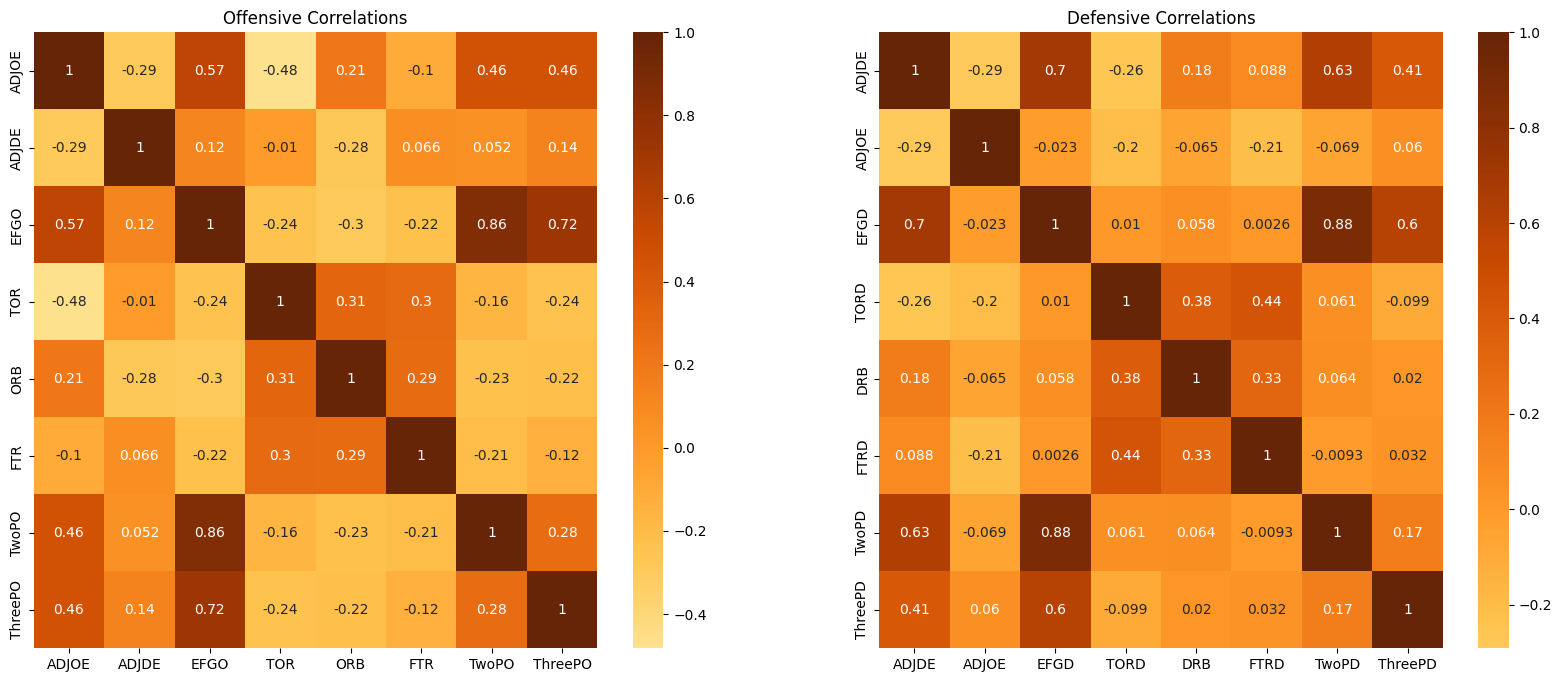

In [27]:
Offensive_Stats = March_qualified[['ADJOE','ADJDE','EFGO','TOR',
                                    'ORB','FTR','TwoPO','ThreePO']]
Defensive_Stats = March_qualified[['ADJDE','ADJOE','EFGD','TORD',
                                    'DRB', 'FTRD', 'TwoPD','ThreePD']]
Offensive_Corr = Offensive_Stats.corr()
Defensive_Corr = Defensive_Stats.corr()
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.heatmap(ax=ax[0], data=Offensive_Corr, cmap='YlOrBr', annot=True, center=0)
sns.heatmap(ax=ax[1], data=Defensive_Corr, cmap='YlOrBr', annot=True, center=0)
ax[0].set_title('Offensive Correlations')
ax[1].set_title('Defensive Correlations')

<ipython-input-28-8633d0adefbb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax[0, 0], data=March_qualified, x='POSTSEASON', y='ADJOE', order=Postseason_labels, palette=palette)
<ipython-input-28-8633d0adefbb>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax[0, 1], data=March_qualified, x='POSTSEASON', y='ADJDE', order=Postseason_labels, palette=palette)
<ipython-input-28-8633d0adefbb>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax[1, 0], data=March_qualified, x='POSTSEASON', y='BARTHAG', order=Postseason_labels, pale

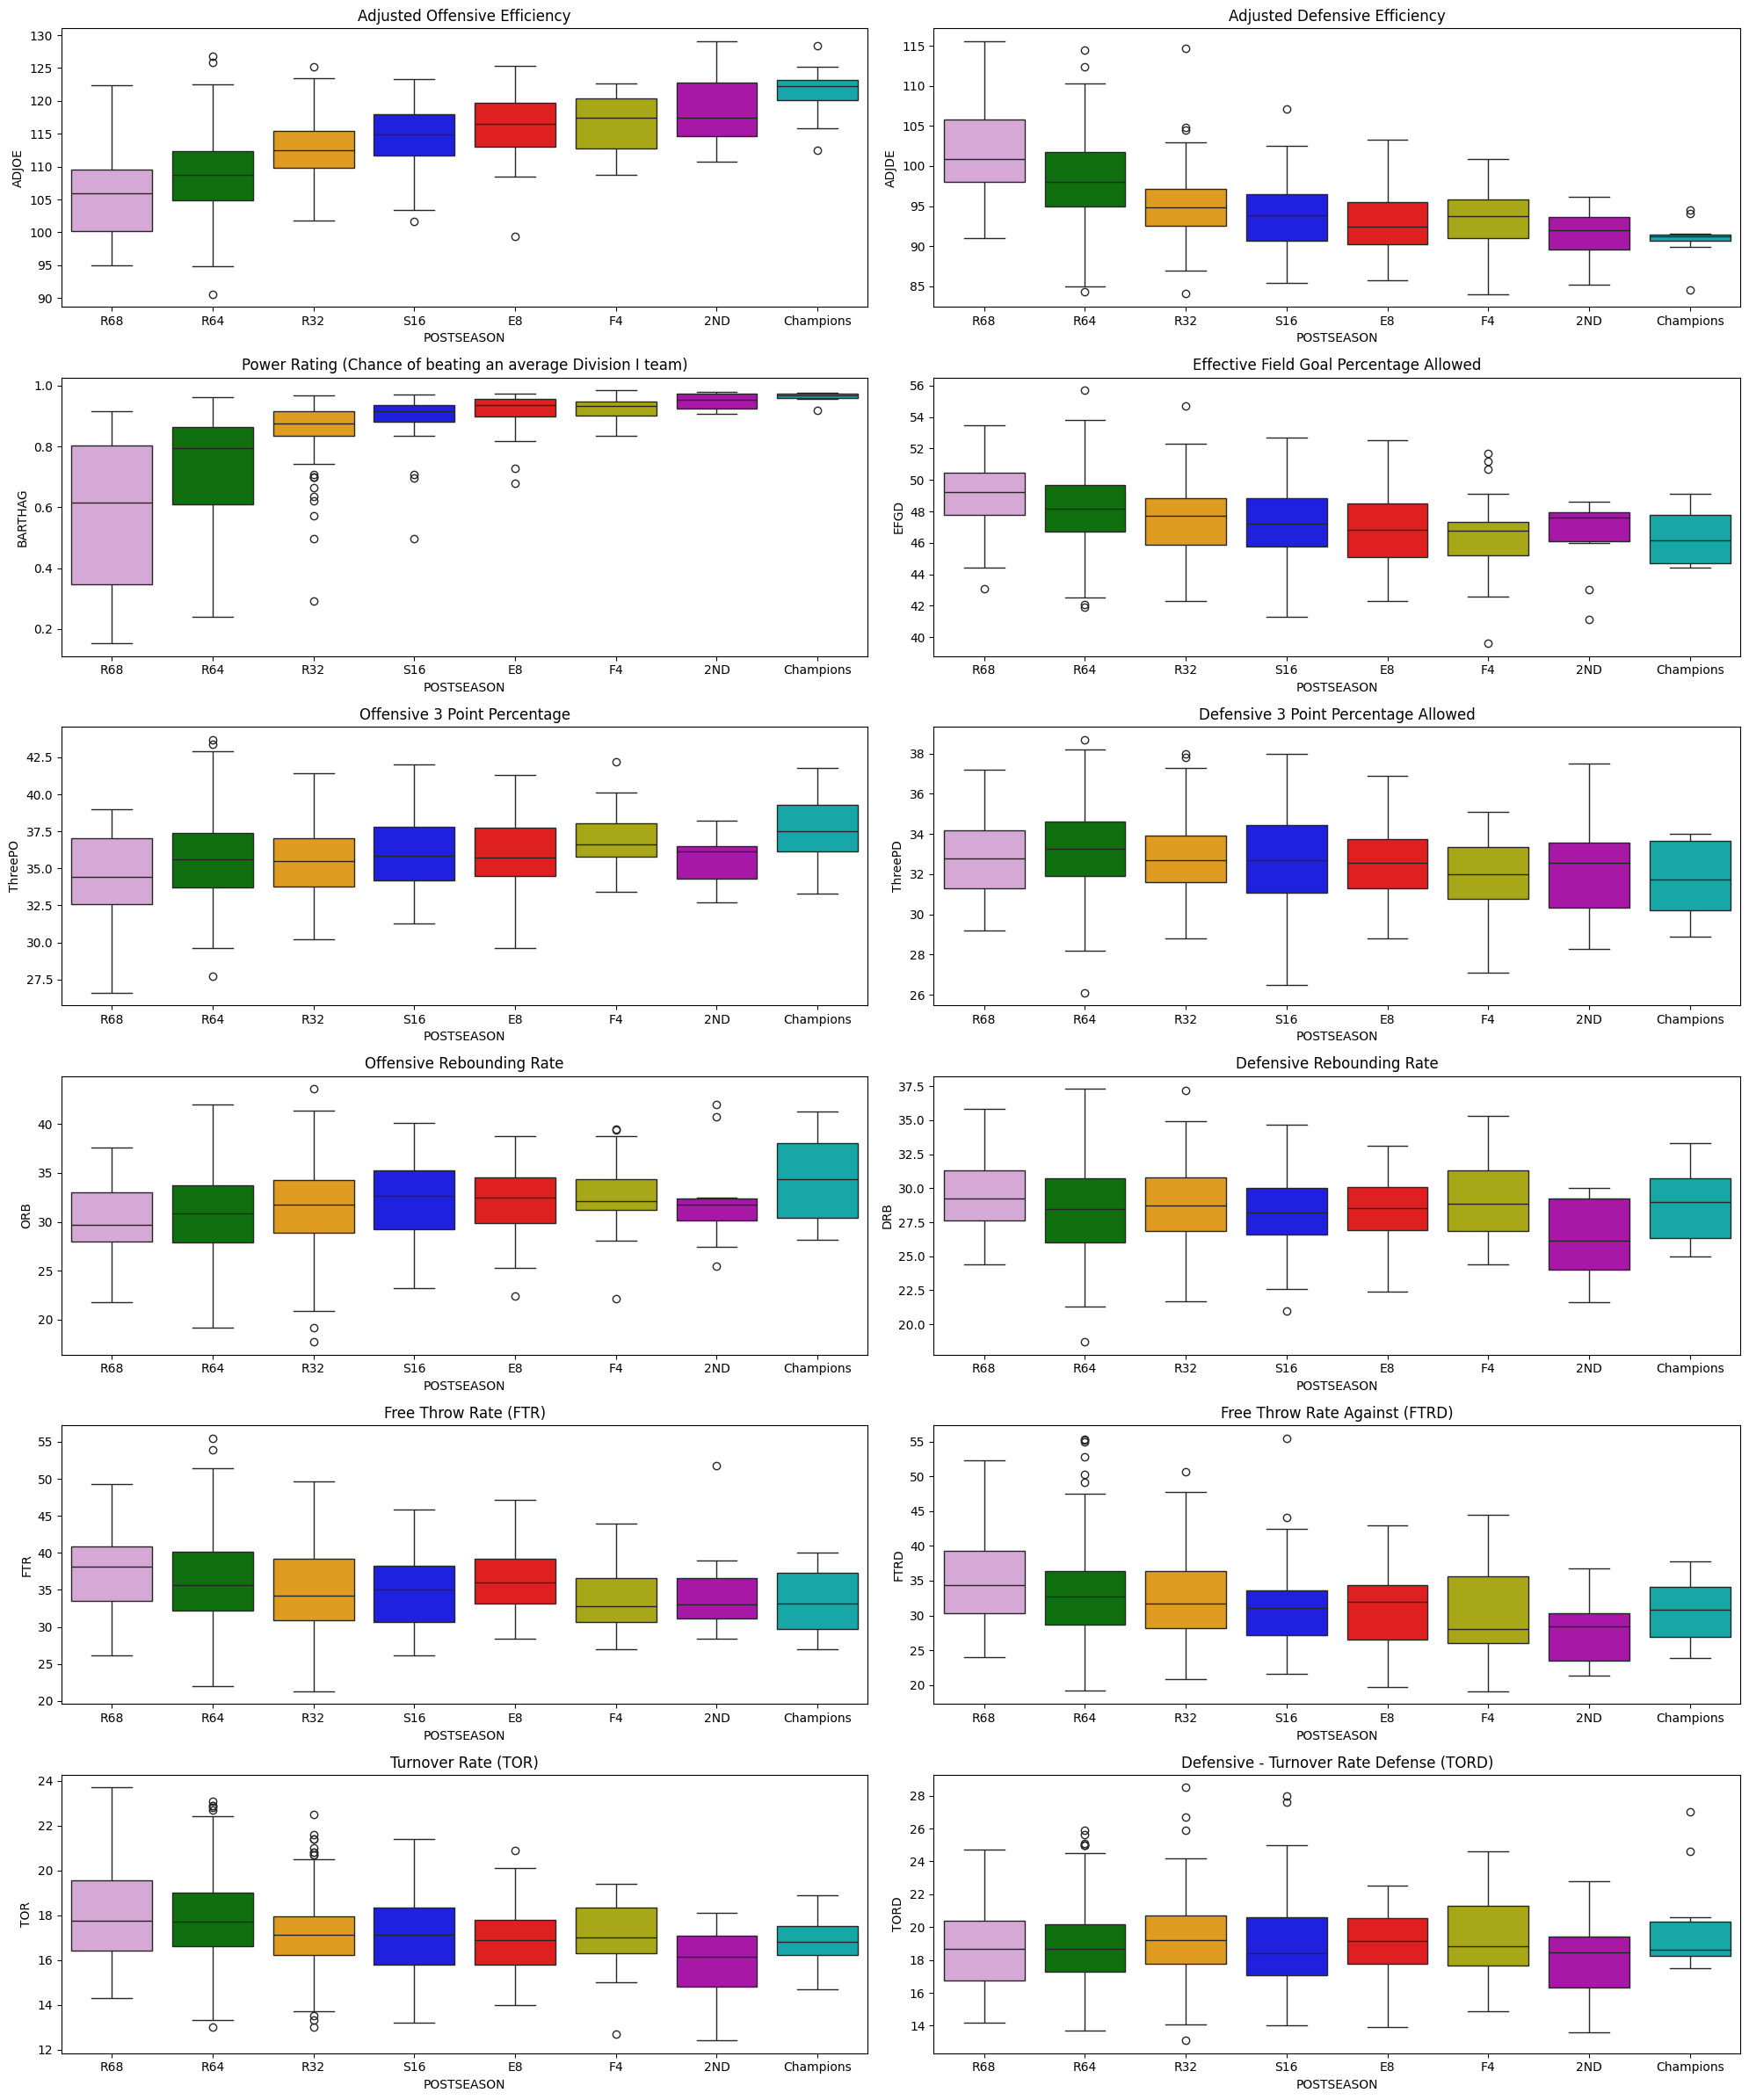

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define your color palette
palette = ['plum', 'g', 'orange', 'b', 'r', 'y', 'm', 'c']

# Create subplots for box plots
fig, ax = plt.subplots(6, 2, figsize=(20, 24))  # Adjusted figsize for better layout

# Offensive Adjusted Efficiency
sns.boxplot(ax=ax[0, 0], data=March_qualified, x='POSTSEASON', y='ADJOE', order=Postseason_labels, palette=palette)
ax[0, 0].set_title('Adjusted Offensive Efficiency')

# Defensive Adjusted Efficiency
sns.boxplot(ax=ax[0, 1], data=March_qualified, x='POSTSEASON', y='ADJDE', order=Postseason_labels, palette=palette)
ax[0, 1].set_title('Adjusted Defensive Efficiency')

# Offensive 2 Point Percentage
sns.boxplot(ax=ax[1, 0], data=March_qualified, x='POSTSEASON', y='BARTHAG', order=Postseason_labels, palette=palette)
ax[1, 0].set_title('Power Rating (Chance of beating an average Division I team)')

# Defensive 2 Point Percentage Allowed
sns.boxplot(ax=ax[1, 1], data=March_qualified, x='POSTSEASON', y='EFGD', order=Postseason_labels, palette=palette)
ax[1, 1].set_title('Effective Field Goal Percentage Allowed')

# Offensive 3 Point Percentage
sns.boxplot(ax=ax[2, 0], data=March_qualified, x='POSTSEASON', y='ThreePO', order=Postseason_labels, palette=palette)
ax[2, 0].set_title('Offensive 3 Point Percentage')

# Defensive 3 Point Percentage Allowed
sns.boxplot(ax=ax[2, 1], data=March_qualified, x='POSTSEASON', y='ThreePD', order=Postseason_labels, palette=palette)
ax[2, 1].set_title('Defensive 3 Point Percentage Allowed')

# Offensive Rebounding Rate
sns.boxplot(ax=ax[3, 0], data=March_qualified, x='POSTSEASON', y='ORB', order=Postseason_labels, palette=palette)
ax[3, 0].set_title('Offensive Rebounding Rate')

# Defensive Rebounding Rate
sns.boxplot(ax=ax[3, 1], data=March_qualified, x='POSTSEASON', y='DRB', order=Postseason_labels, palette=palette)
ax[3, 1].set_title('Defensive Rebounding Rate')

# Free Throw Rate (FTR)
sns.boxplot(ax=ax[4, 0], data=March_qualified, x='POSTSEASON', y='FTR', order=Postseason_labels, palette=palette)
ax[4, 0].set_title('Free Throw Rate (FTR)')

# Free Throw Rate Defense (FTRD)
sns.boxplot(ax=ax[4, 1], data=March_qualified, x='POSTSEASON', y='FTRD', order=Postseason_labels, palette=palette)
ax[4, 1].set_title('Free Throw Rate Against (FTRD)')

# Turnover Rate (TOR)
sns.boxplot(ax=ax[5, 0], data=March_qualified, x='POSTSEASON', y='TOR', order=Postseason_labels, palette=palette)
ax[5, 0].set_title('Turnover Rate (TOR)')

# Turnover Rate Defense (TORD)
sns.boxplot(ax=ax[5, 1], data=March_qualified, x='POSTSEASON', y='TORD', order=Postseason_labels, palette=palette)
ax[5, 1].set_title('Defensive - Turnover Rate Defense (TORD)')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<ipython-input-29-31f003cbafd8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=March_qualified, x='POSTSEASON', palette='viridis')


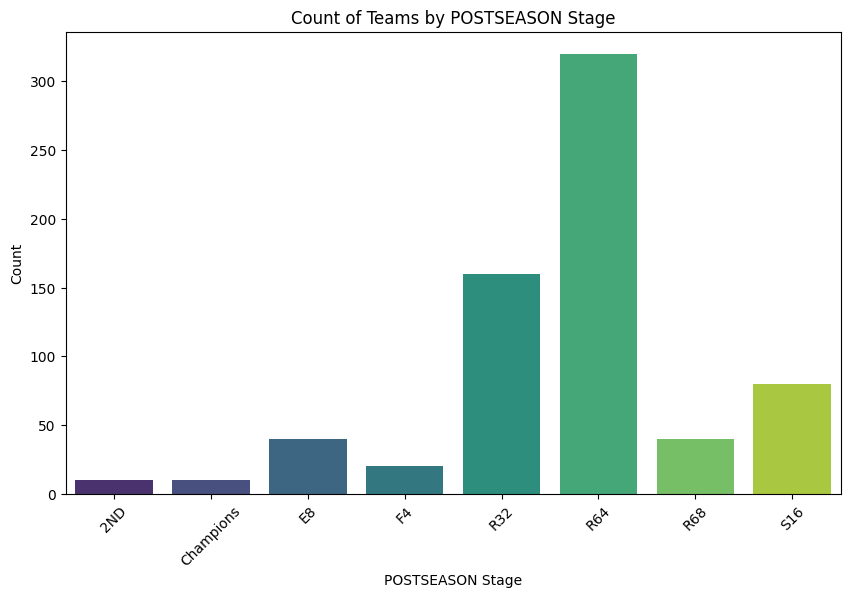

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=March_qualified, x='POSTSEASON', palette='viridis')
plt.title('Count of Teams by POSTSEASON Stage')
plt.xlabel('POSTSEASON Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



Data Preprocessing

In [30]:
# Convert POSTSEASON to numerical labels
postseason_mapping = {
    'Champions': 1,
    '2ND': 2,
    'F4': 3,
    'E8': 4,
    'S16': 5,
    'R32': 6,
    'R64': 7
}
March_qualified['POSTSEASON_LABEL'] = March_qualified['POSTSEASON'].map(postseason_mapping)

# Define features and target
features = ['ADJOE', 'ADJDE', 'BARTHAG', 'EFGO', 'EFGD', 'TOR', 'TORD', 'ORB',
            'DRB', 'FTR', 'FTRD', 'TwoPO', 'TwoPD', 'ThreePO', 'ThreePD', 'ADJT', 'WAB',
            'SEED']
target = 'POSTSEASON_LABEL'

# Drop rows with missing target values
Qaulified_For_MM = March_qualified.dropna(subset=[target])

# Split data into features and target
X = Qaulified_For_MM[features]
y = Qaulified_For_MM[target]

# Handle missing values with more robust imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA to selected features
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

### **Random Forest**

In [31]:
# Define and tune the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train_pca, y_train)
print(f"Best Parameters for Random Forest: {rf_grid_search.best_params_}")

# Get the best model from grid search
rf_model_best = rf_grid_search.best_estimator_

# Cross-validation with PCA features
cv_scores_rf_pca = cross_val_score(rf_model_best, X_pca, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy (Random Forest): {cv_scores_rf_pca.mean()}")

# Train and evaluate on test set with PCA features
rf_model_best.fit(X_train_pca, y_train)
y_pred_rf_pca = rf_model_best.predict(X_test_pca)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_pca))

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Cross-Validation Accuracy (Random Forest): 0.4890625
Random Forest Accuracy: 0.4921875


## **Gradient Boosting**

In [32]:
# Define and train the Gradient Boosting model
gbm_model_pca = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Cross-validation with PCA features
cv_scores_gbm_pca = cross_val_score(gbm_model_pca, X_pca, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores_gbm_pca.mean()}")

# Train and evaluate on test set with PCA features
gbm_model_pca.fit(X_train_pca, y_train)
y_pred_gbm_pca = gbm_model_pca.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred_gbm_pca))

Cross-Validation Accuracy: 0.4671875
Accuracy: 0.453125


## **Support Vector Machine**

In [33]:
# Define and train the SVM model
svm_model_pca = SVC(random_state=42)

# Cross-validation with PCA features
cv_scores_svm_pca = cross_val_score(svm_model_pca, X_pca, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores_svm_pca.mean()}")

# Train and evaluate on test set with PCA features
svm_model_pca.fit(X_train_pca, y_train)
y_pred_svm_pca = svm_model_pca.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred_svm_pca))

Cross-Validation Accuracy: 0.5046875
Accuracy: 0.484375


## **Logistic Regression**

In [34]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Scale your features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Apply PCA on the training data
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 4: Create Logistic Regression with GridSearch
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=2000, random_state=42), param_grid, cv=StratifiedKFold(n_splits=5))
grid_search.fit(X_train_pca, y_train)

print(f"Best parameters: {grid_search.best_params_}")

# Step 5: Evaluate cross-validation
best_lr_model = grid_search.best_estimator_
cv_scores_lr = cross_val_score(best_lr_model, X_train_pca, y_train, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores_lr.mean()}")

# Define and train the SVM model
lr_model_pca = LogisticRegression(random_state=42)
# Train and evaluate on test set with PCA features
lr_model_pca.fit(X_train_pca, y_train)
y_pred_lr_pca = lr_model_pca.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred_lr_pca))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'C': 0.01, 'solver': 'lbfgs'}
Cross-Validation Accuracy: 0.5332381496287836
Accuracy: 0.5234375
